<a href="https://colab.research.google.com/github/regisalbuquerque/decision_trees/blob/main/DTree_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DADOS**

In [30]:
# Importar libraries
import pandas as pd

# Importar o DataSet
# https://github.com/npradaschnor/Pima-Indians-Diabetes-Dataset
# This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
# The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, 
# based on certain diagnostic measurements included in the dataset. Several constraints were placed 
# on the selection of these instances from a larger database. In particular, all patients here are 
# females at least 21 years old of Pima Indian heritage.
features_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
target_name = ['label']
labels = ['0', '1']
col_names = features_names + target_name
df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv', header=0, names=col_names ,delimiter=',')


# Imprimir parte do DataSet para entendimento
print("Quantidade de Linhas: ", len(df.index))
df.head(5)


Quantidade de Linhas:  768


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
from sklearn.model_selection import train_test_split

# Dividir o dataset em atributos e classe

X = df[features_names] # Features
y = df.label # Target variable

#X[:5]
#y[:5]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

X_train[:5]
#X_test[:5]
#y_train[:5]
#y_test[:5]

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


# **ÁRVORE SEM OTIMIZAÇÃO**

## TREINAMENTO

In [24]:
from sklearn.tree import DecisionTreeClassifier
import time

arvore = DecisionTreeClassifier(random_state=0)

# Fazer o treinamento - sem modificar os parâmetros
start_time = time.time()
arvore.fit(X_train,y_train)
time_arvore = time.time() - start_time

print("Tempo de Construção: ", time_arvore)
print("Níveis da Árvore: ", arvore.get_depth())
print("Folhas: ", arvore.get_n_leaves())


Tempo de Construção:  0.011710405349731445
Níveis da Árvore:  16
Folhas:  97


Acurácia: 69.26406926 %
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       146
           1       0.59      0.53      0.56        85

    accuracy                           0.69       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



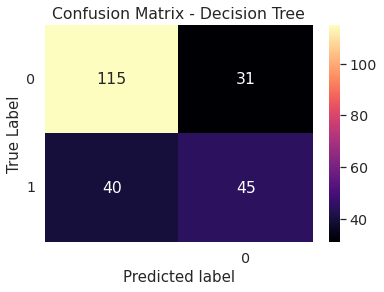

<Figure size 720x504 with 0 Axes>

In [32]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Realizar as predições na árvore (modelo treinado)
y_pred = arvore.predict(X_test)

# Verificar a acurácia
acuracia = metrics.accuracy_score(y_test, y_pred)
print("Acurácia:", str(round(acuracia * 100, 8)), "%")

print(metrics.classification_report(y_test, y_pred))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()




## A ÁRVORE

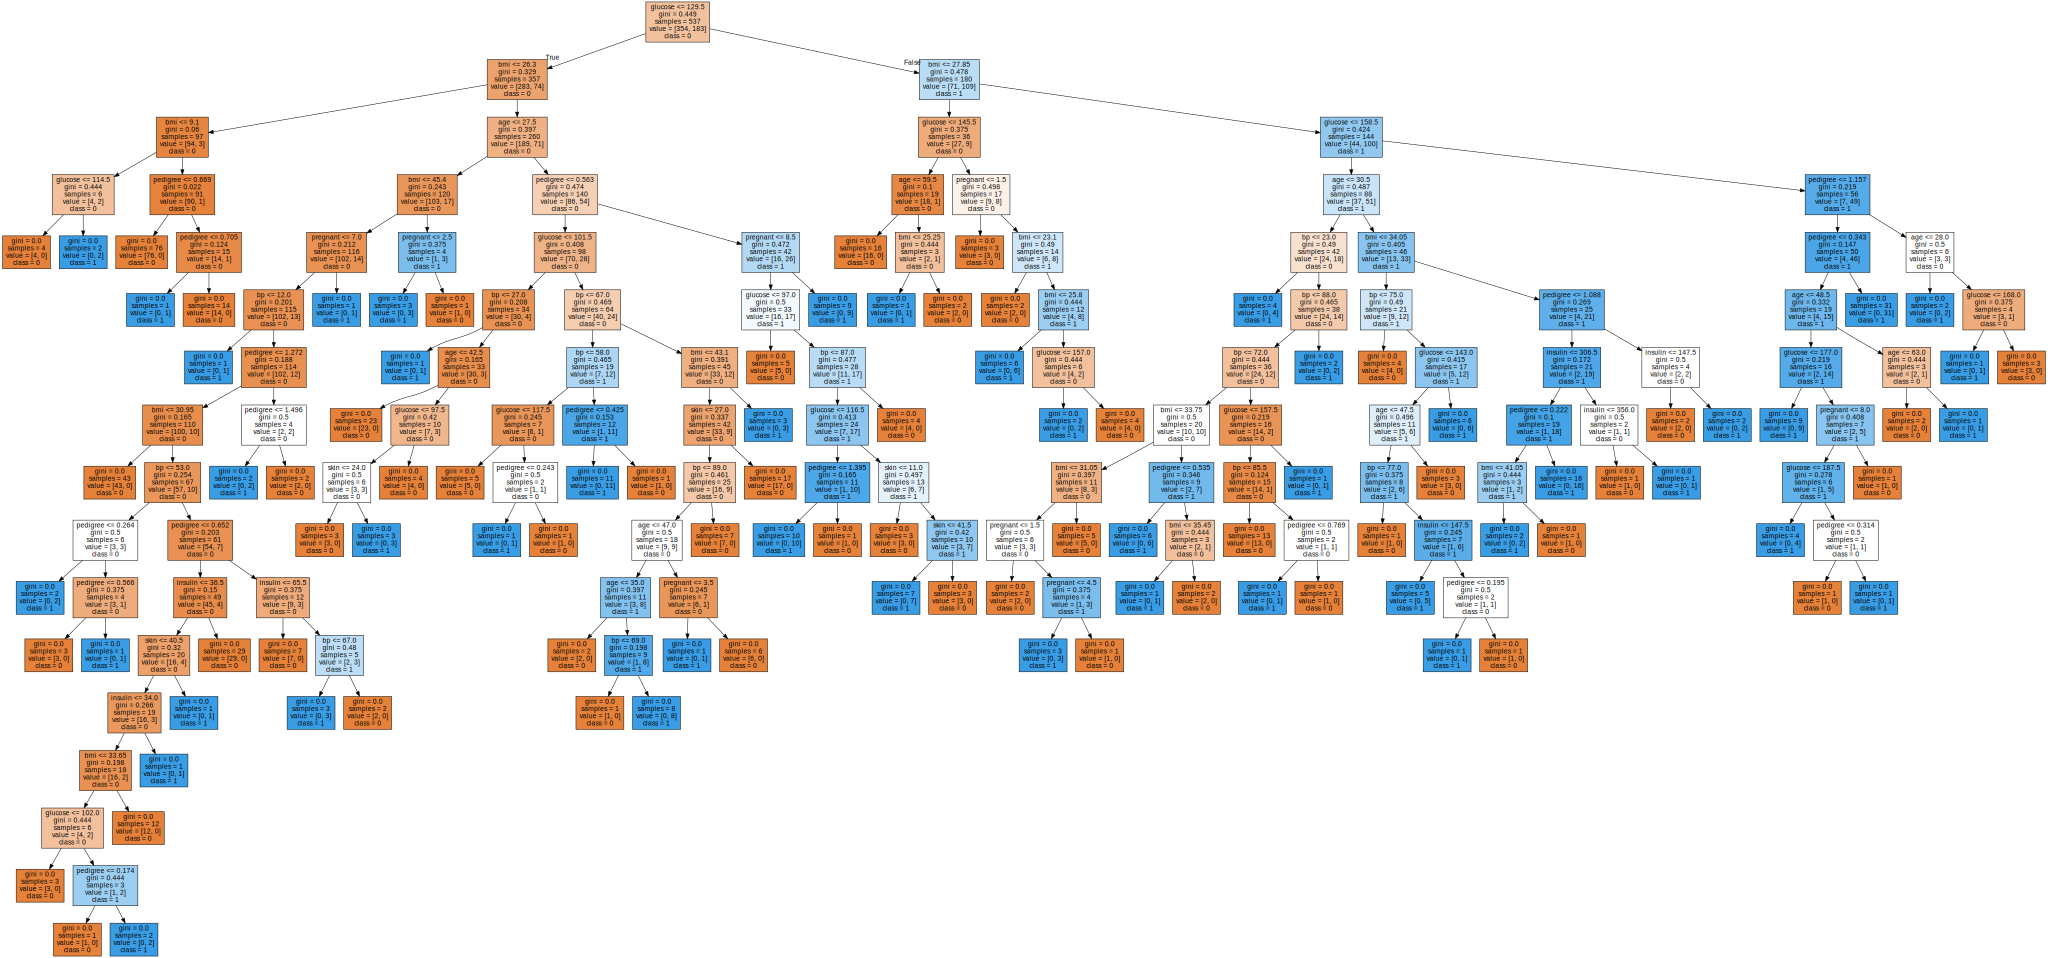

In [29]:
import graphviz
import pydotplus
from sklearn import tree

# DOT data
dot_data = tree.export_graphviz(arvore, out_file=None, 
                                feature_names=features_names,  
                                class_names=['0', '1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


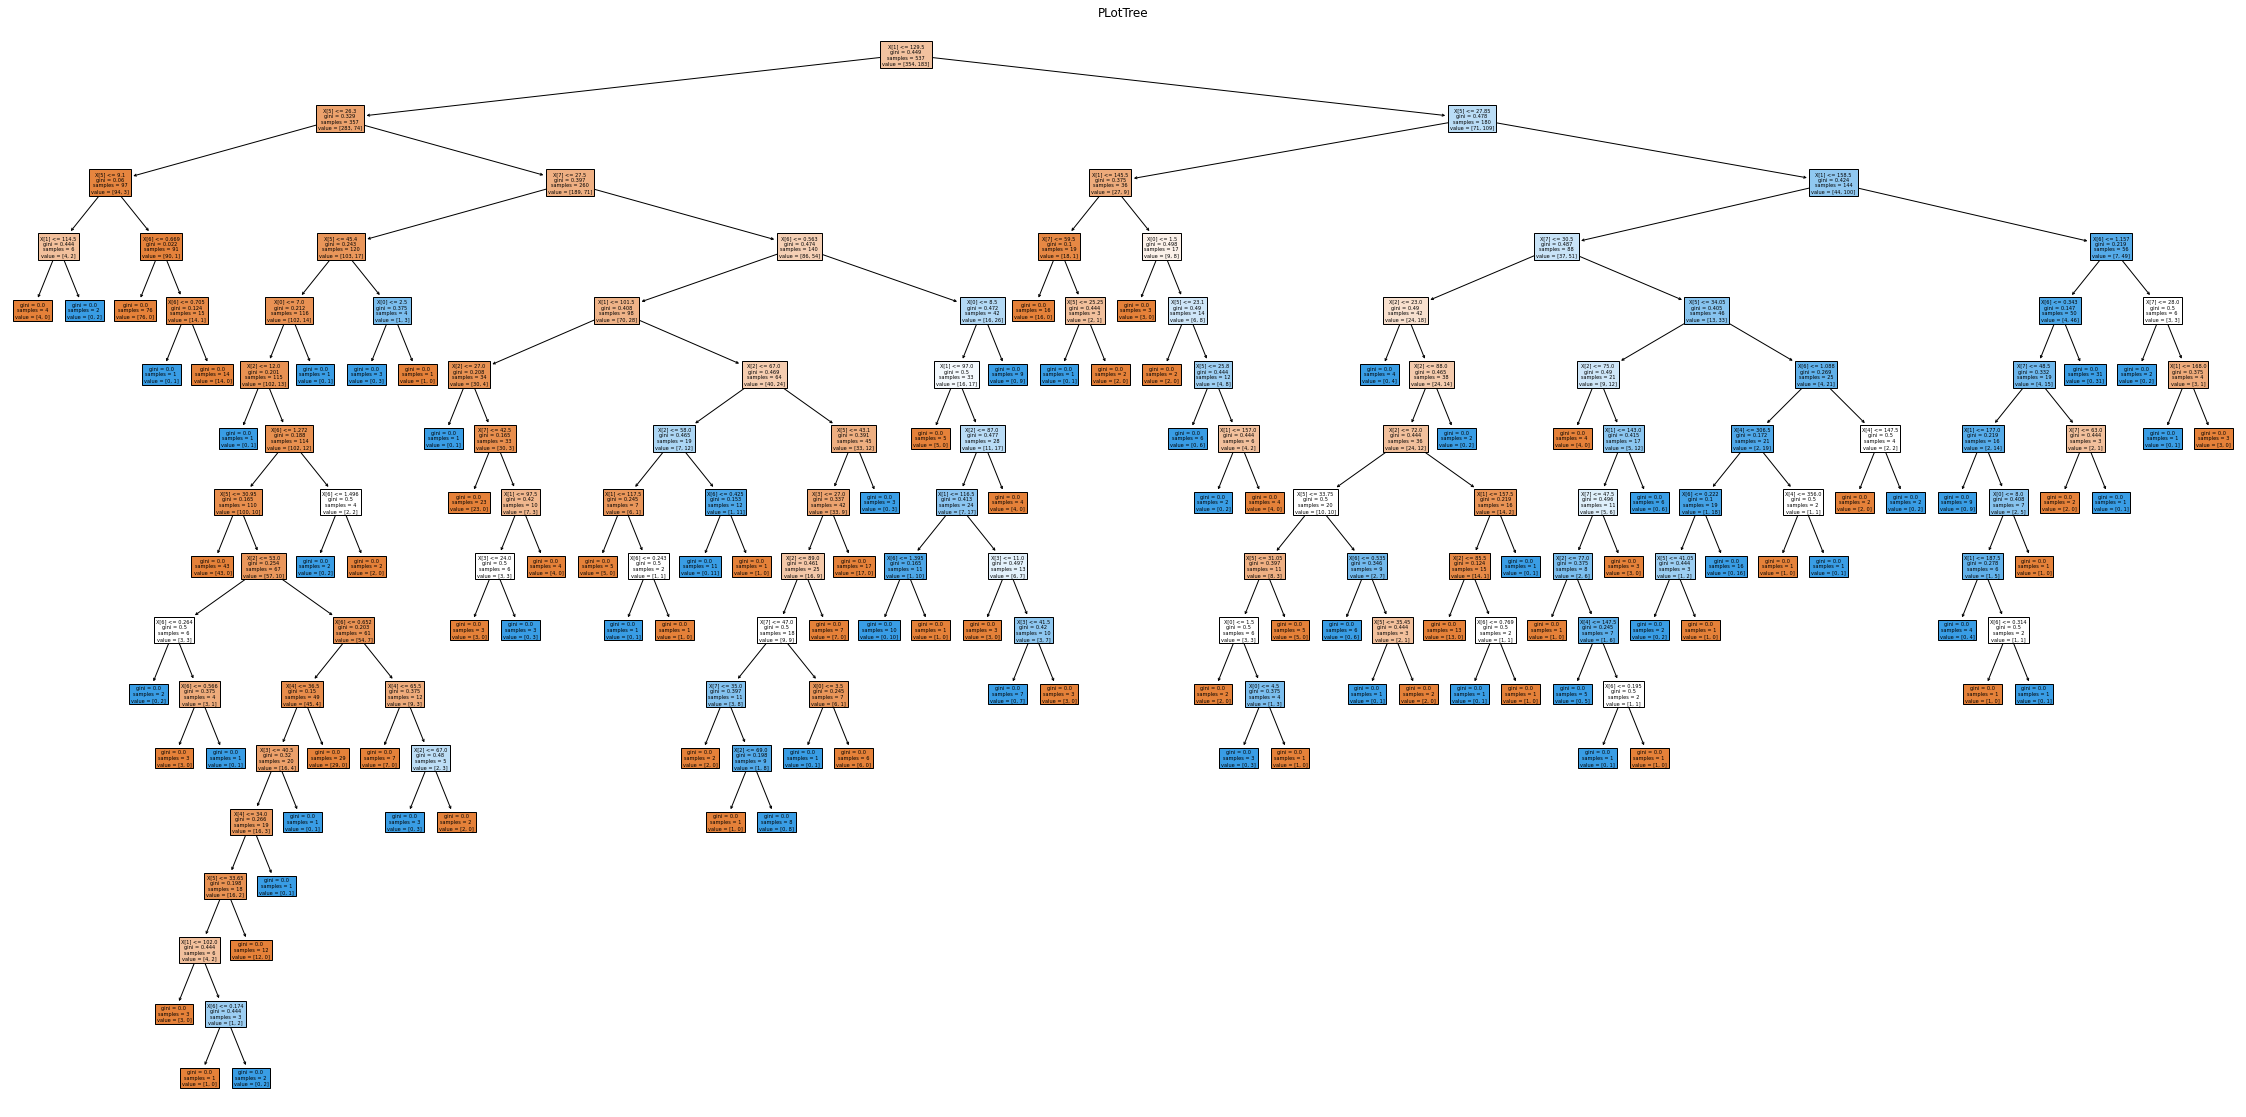

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(40, 20)
fig.savefig('test2png.png', dpi=150)
plot_tree(arvore, filled=True)
plt.title("PLotTree")
plt.show()

# **ÁRVORE COM OTIMIZAÇÃO**

## TREINAMENTO

In [26]:
from sklearn.tree import DecisionTreeClassifier

arvore_otimizada = DecisionTreeClassifier(random_state=0, max_depth=3)

# Fazer o treinamento - sem modificar os parâmetros
start_time = time.time()
arvore_otimizada.fit(X_train,y_train)
time_arvore_otimizada = time.time() - start_time

print("Tempo de Construção: ", time_arvore_otimizada)
print("Níveis da Árvore: ", arvore_otimizada.get_depth())
print("Folhas: ", arvore_otimizada.get_n_leaves())

Tempo de Construção:  0.007969856262207031
Níveis da Árvore:  3
Folhas:  8


Acurácia: 75.75757576 %
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       146
           1       0.72      0.56      0.63        85

    accuracy                           0.76       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231



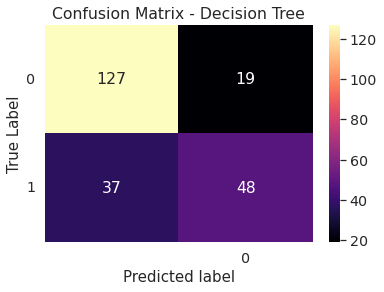

<Figure size 720x504 with 0 Axes>

In [34]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Realizar as predições na árvore (modelo treinado)
y_pred_otimizado = arvore_otimizada.predict(X_test)

# Verificar a acurácia
acuracia = metrics.accuracy_score(y_test, y_pred_otimizado)
print("Acurácia:", str(round(acuracia * 100, 8)), "%")

print(metrics.classification_report(y_test, y_pred_otimizado))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_otimizado)#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

## A ÁRVORE

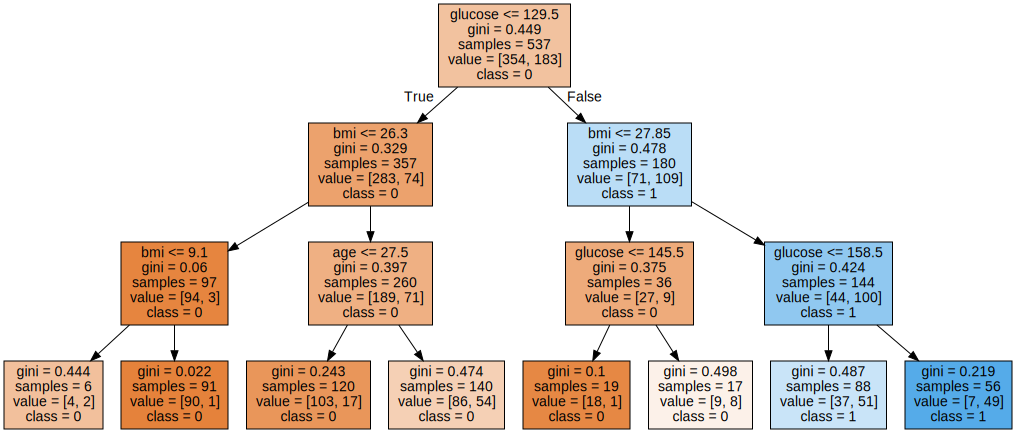

In [19]:
import graphviz
import pydotplus
from sklearn import tree

# DOT data
dot_data = tree.export_graphviz(arvore_otimizada, out_file=None, 
                                feature_names=features_names,  
                                class_names=['0', '1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


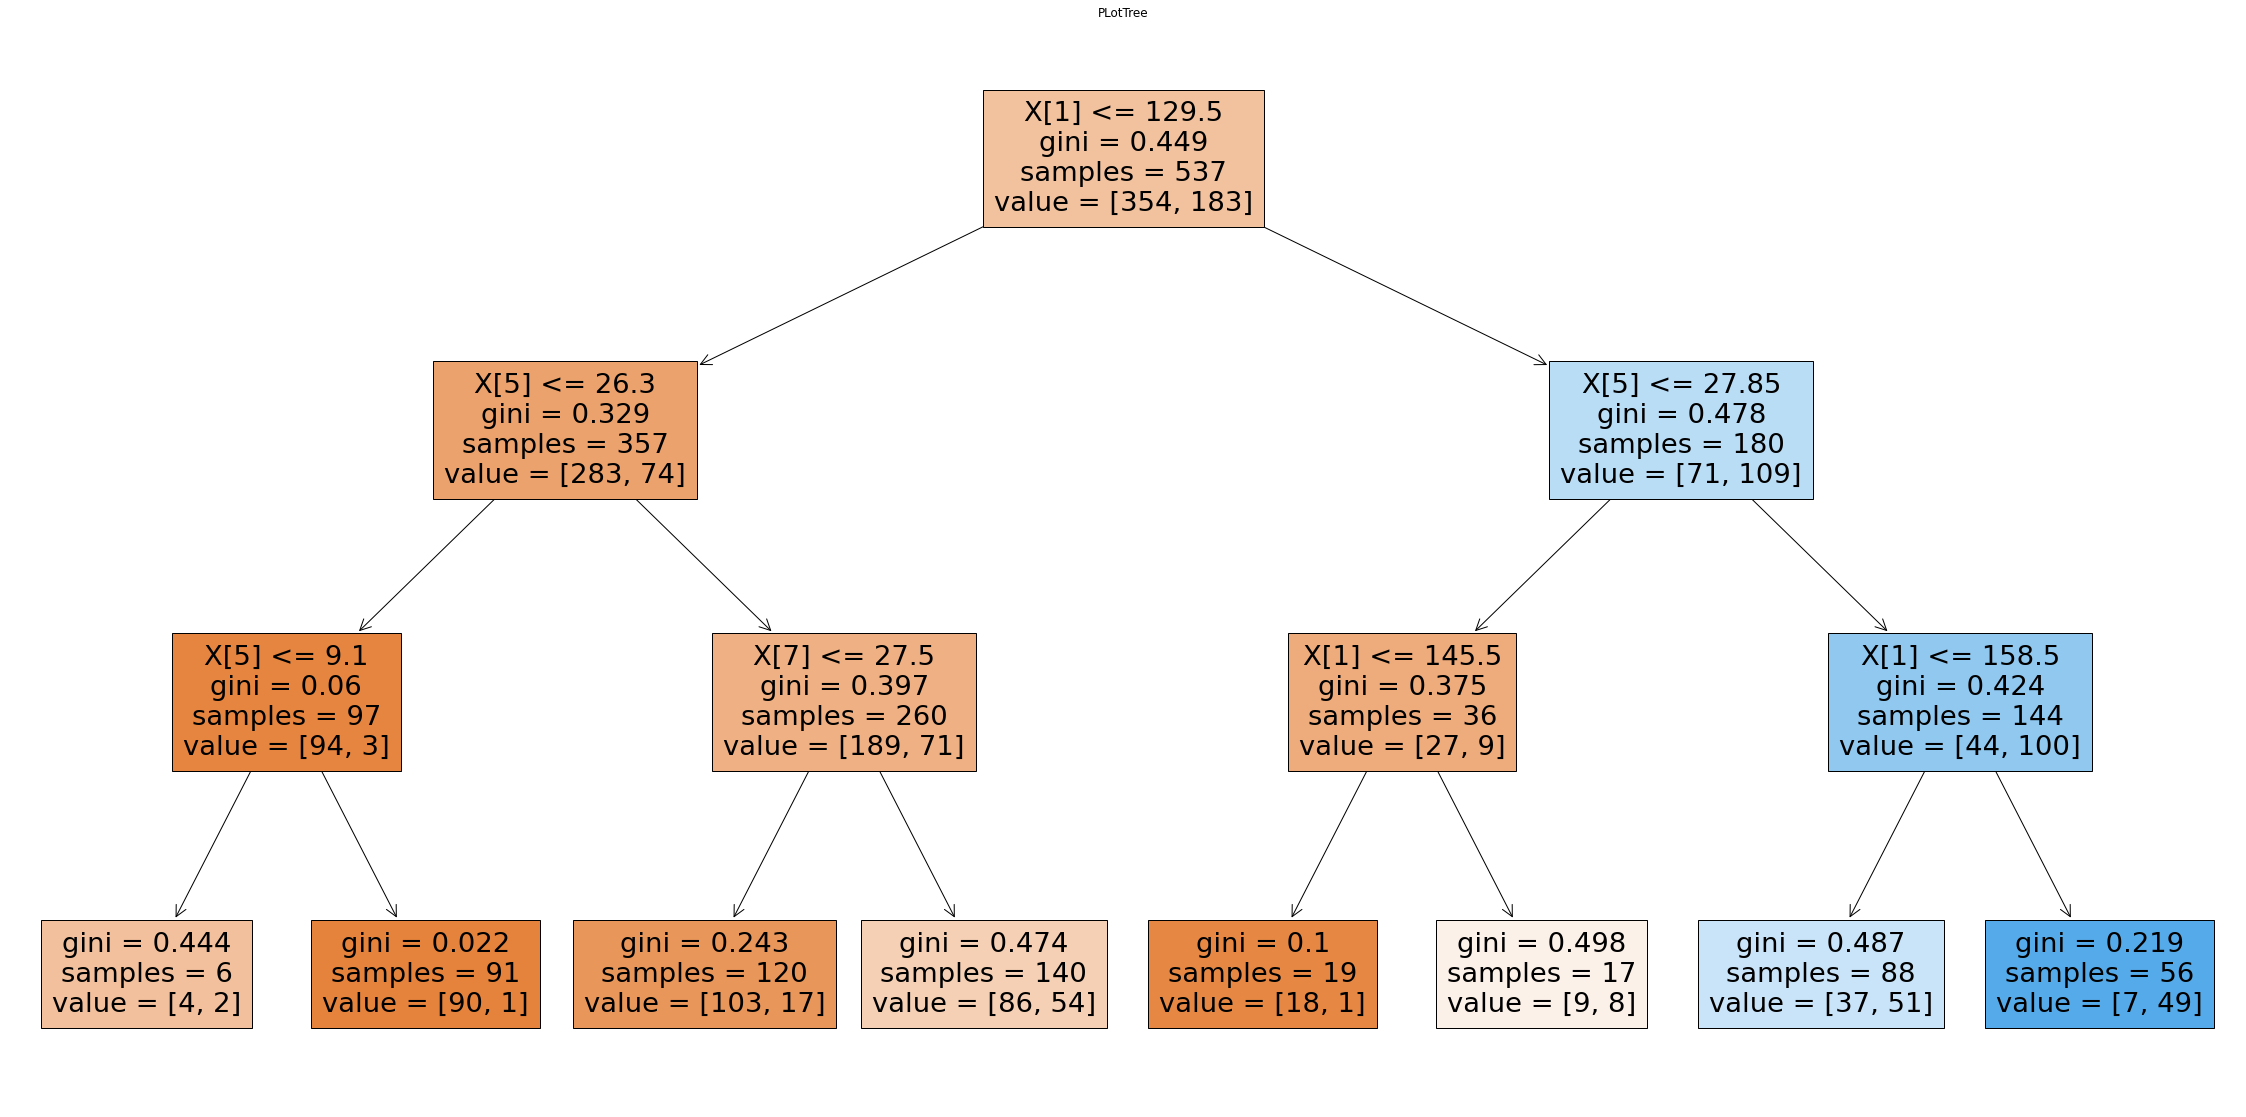

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(40, 20)
fig.savefig('test2png.png', dpi=150)
plot_tree(arvore_otimizada, filled=True)
plt.title("PLotTree")
plt.show()